In [1]:
import tweepy
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


In [2]:
# Twitter API Keys

consumer_key = "XPKCWiE4tAtmufESqP94hXTuY"
consumer_secret = "Hu0NtIffajdG22DlFPiur8gBd8t2MQeBWEwRrl48qRCT2v9Kf4"
access_token = "20581045-BpJ4v1k01C83x0cQDCmlXckCh4DbYL6Mkyw6ulFEV"
access_token_secret = "cmP0b4ESMcs4p9201gY4KYIkw5pacfTeRD5ofLKveSvqm"

In [3]:
# Setup Tweepy API Authentication

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
#Get user names

BBC = "@BBCWorld"
CBS = "@CBSNews"
CNN = "@CNN"
Fox = "@FoxNews"
NYT = "@nytimes"

In [5]:
#Get BBC Tweets

# Counter
counter = 1

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    BBCTweets = api.user_timeline(BBC)

    # Loop through all tweets
    for tweet in BBCTweets:

        # Print Tweets
        print("Tweet %s: %s" % (counter, tweet["text"]))

        # Add to Counter
        counter = counter + 1

Tweet 1: RT @BBCNewsAsia: A Japanese woman has died in awful conditions, after being imprisoned by her own parents for 15 years: https://t.co/h4Z9CX…
Tweet 2: RT @BBCBreaking: Massive fire breaks out at popular Mumbai complex, killing at least 14 people, officials say: https://t.co/JM3qSBfYgG
Tweet 3: RT @BBCNewsAsia: A round of applause for this forest guard in southern India, who just saved a baby elephant that fell into a ditch!

🐘👏👏👏:…
Tweet 4: RT @BBCNewsAsia: In Afghanistan, young women are reportedly being subjected to degrading virginity tests: https://t.co/kaOfIvl9Zd https://t…
Tweet 5: Justine Damond: US prosecutor delays decision on charges https://t.co/benciXqRnR
Tweet 6: Elephant rescue https://t.co/Cv9JVGiW1W
Tweet 7: Exporting doctors https://t.co/7Wx3qWa4Ui
Tweet 8: A matter of shame https://t.co/r4wgQXGpOl
Tweet 9: Path to legalisation https://t.co/x8x7kEXUSV
Tweet 10: Africa's year in pictures 2017 https://t.co/otwkE4Vjap
Tweet 11: Brazilian fishermen work with dolphi

In [6]:
#Getting Vader Anaslysis for BBC Tweets
from pandas import Series, DataFrame

tweet = []
vs_compound = []
vs_pos = []
vs_neu = []
vs_neg = []

for i in range(0, len(BBCTweets)):
    tweet.append(BBCTweets[i]['text'])
    vs_compound.append(analyzer.polarity_scores(BBCTweets[i]['text'])['compound'])
    vs_pos.append(analyzer.polarity_scores(BBCTweets[i]['text'])['pos'])
    vs_neu.append(analyzer.polarity_scores(BBCTweets[i]['text'])['neu'])
    vs_neg.append(analyzer.polarity_scores(BBCTweets[i]['text'])['neg'])
    
    BBC_df = DataFrame({'Tweet': tweet,
                        'Compound': vs_compound,
                        'Positive': vs_pos,
                        'Neutral': vs_neu,
                        'Negative': vs_neg})
BBC_df = BBC_df[['Tweet', 'Compound','Positive', 'Neutral', 'Negative']]

BBC_df['Source'] = 'BBC'
BBC_df['Counter'] = range(len(BBC_df))

# Top 5 results.
BBC_df.head()

,Tweet,Compound,Positive,Neutral,Negative,Source,Counter
0,RT @BBCNewsAsia: A Japanese woman has died in ...,-0.8625,0.000,0.639,0.361,BBC,0
1,RT @BBCBreaking: Massive fire breaks out at po...,-0.6124,0.114,0.610,0.276,BBC,1
2,RT @BBCNewsAsia: A round of applause for this ...,0.7088,0.228,0.772,0.000,BBC,2
3,"RT @BBCNewsAsia: In Afghanistan, young women a...",-0.5859,0.000,0.798,0.202,BBC,3
4,Justine Damond: US prosecutor delays decision ...,-0.2732,0.000,0.792,0.208,BBC,4


In [7]:
#Get CBS Tweets

# Counter
counter = 1

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    CBSTweets = api.user_timeline(CBS)

    # Loop through all tweets
    for tweet in CBSTweets:

        # Print Tweets
        print("Tweet %s: %s" % (counter, tweet["text"]))

        # Add to Counter
        counter = counter + 1

Tweet 1: After 8-day uproar since news first broke that Apple intentionally slowed down older iPhone models to save battery… https://t.co/4BwE2TXfcU
Tweet 2: "Here is my promise to you: I may be leaving the Senate, but I am not giving up my voice." Al Franken addresses sup… https://t.co/T0EHk4itrl
Tweet 3: Rose Marie, the wisecracking Sally Rogers of "The Dick Van Dyke Show," is dead at 94 https://t.co/0HDsYdwsaq https://t.co/uKd6n18mvL
Tweet 4: About 40,000 pounds of avocados spilled onto a Texas highway Thursday after an 18-wheeler hauling them caught fire. https://t.co/ZHJzHntHWQ
Tweet 5: Man arrested for allegedly biting off part of relative's ear during drunken confrontation on Christmas Eve, police… https://t.co/7leWLXSjZd
Tweet 6: Airlines are testing new technology to improve security and speed up the boarding process. That includes new biomet… https://t.co/auznTGB1av
Tweet 7: "The takeaway from our preparation is this: people will be safe and should feel safe too." NYPD promis

Tweet 61: After 8-day uproar since news first broke that Apple intentionally slowed down older iPhone models to save battery… https://t.co/4BwE2TXfcU
Tweet 62: "Here is my promise to you: I may be leaving the Senate, but I am not giving up my voice." Al Franken addresses sup… https://t.co/T0EHk4itrl
Tweet 63: Rose Marie, the wisecracking Sally Rogers of "The Dick Van Dyke Show," is dead at 94 https://t.co/0HDsYdwsaq https://t.co/uKd6n18mvL
Tweet 64: About 40,000 pounds of avocados spilled onto a Texas highway Thursday after an 18-wheeler hauling them caught fire. https://t.co/ZHJzHntHWQ
Tweet 65: Man arrested for allegedly biting off part of relative's ear during drunken confrontation on Christmas Eve, police… https://t.co/7leWLXSjZd
Tweet 66: Airlines are testing new technology to improve security and speed up the boarding process. That includes new biomet… https://t.co/auznTGB1av
Tweet 67: "The takeaway from our preparation is this: people will be safe and should feel safe too." NYPD

In [8]:
#Getting Vader Anaslysis for CBS Tweets

tweet = []
vs_compound = []
vs_pos = []
vs_neu = []
vs_neg = []

for i in range(0, len(CBSTweets)):
    tweet.append(CBSTweets[i]['text'])
    vs_compound.append(analyzer.polarity_scores(CBSTweets[i]['text'])['compound'])
    vs_pos.append(analyzer.polarity_scores(CBSTweets[i]['text'])['pos'])
    vs_neu.append(analyzer.polarity_scores(CBSTweets[i]['text'])['neu'])
    vs_neg.append(analyzer.polarity_scores(CBSTweets[i]['text'])['neg'])
    
    CBS_df = DataFrame({'Tweet': tweet,
                        'Compound': vs_compound,
                        'Positive': vs_pos,
                        'Neutral': vs_neu,
                        'Negative': vs_neg})
CBS_df = CBS_df[['Tweet', 'Compound','Positive', 'Neutral', 'Negative']]

CBS_df['Source'] = 'CBS'
CBS_df['Counter'] = range(len(CBS_df))

# Have a look at the top 5 results.
CBS_df.head()

,Tweet,Compound,Positive,Neutral,Negative,Source,Counter
0,After 8-day uproar since news first broke that...,0.1027,0.139,0.739,0.122,CBS,0
1,"""Here is my promise to you: I may be leaving t...",-0.2273,0.065,0.833,0.101,CBS,1
2,"Rose Marie, the wisecracking Sally Rogers of ""...",-0.8481,0.000,0.620,0.380,CBS,2
3,"About 40,000 pounds of avocados spilled onto a...",-0.3400,0.000,0.876,0.124,CBS,3
4,Man arrested for allegedly biting off part of ...,-0.6597,0.000,0.748,0.252,CBS,4


In [9]:
#Get CNN Tweets

# Counter
counter = 1

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    CNNTweets = api.user_timeline(CNN)

    # Loop through all tweets
    for tweet in CNNTweets:

        # Print Tweets
        print("Tweet %s: %s" % (counter, tweet["text"]))

        # Add to Counter
        counter = counter + 1

Tweet 1: President Trump's first formal medical exam since taking office will be on Jan 12
https://t.co/0YtFGLuOv7 https://t.co/EvmhbIwkXa
Tweet 2: Apple now requires CEO Tim Cook to fly a private plane for "all business and personal travel"… https://t.co/EFaB7Yxus6
Tweet 3: Apple has apologized to customers for how it rolled out an update that can slow down older iPhones and is offering… https://t.co/ncttRsI6HK
Tweet 4: Two parents want to see police body camera and dashcam footage of their son's arrest after a Christmas Eve encounte… https://t.co/kLAHdTHcRd
Tweet 5: The decision over whether to charge a Minneapolis, Minnesota, police officer for shooting an unarmed woman last Jul… https://t.co/JHzUsJAbG8
Tweet 6: This may be the best food friendship in New York City | via @CNNTravel https://t.co/4hq7DrRcwf https://t.co/WztkHrTwO9
Tweet 7: SoftBank, the Japanese conglomerate, has reached a deal to invest more than $7 billion in Uber for a 15% stake… https://t.co/Ev3yzjYk9F
Tweet 8: Tr

Tweet 81: President Trump's first formal medical exam since taking office will be on Jan 12
https://t.co/0YtFGLuOv7 https://t.co/EvmhbIwkXa
Tweet 82: Apple now requires CEO Tim Cook to fly a private plane for "all business and personal travel"… https://t.co/EFaB7Yxus6
Tweet 83: Apple has apologized to customers for how it rolled out an update that can slow down older iPhones and is offering… https://t.co/ncttRsI6HK
Tweet 84: Two parents want to see police body camera and dashcam footage of their son's arrest after a Christmas Eve encounte… https://t.co/kLAHdTHcRd
Tweet 85: The decision over whether to charge a Minneapolis, Minnesota, police officer for shooting an unarmed woman last Jul… https://t.co/JHzUsJAbG8
Tweet 86: This may be the best food friendship in New York City | via @CNNTravel https://t.co/4hq7DrRcwf https://t.co/WztkHrTwO9
Tweet 87: SoftBank, the Japanese conglomerate, has reached a deal to invest more than $7 billion in Uber for a 15% stake… https://t.co/Ev3yzjYk9F
Twee

In [10]:
#Getting Vader Anaslysis for CNN Tweets

tweet = []
vs_compound = []
vs_pos = []
vs_neu = []
vs_neg = []

for i in range(0, len(CNNTweets)):
    tweet.append(CNNTweets[i]['text'])
    vs_compound.append(analyzer.polarity_scores(CNNTweets[i]['text'])['compound'])
    vs_pos.append(analyzer.polarity_scores(CNNTweets[i]['text'])['pos'])
    vs_neu.append(analyzer.polarity_scores(CNNTweets[i]['text'])['neu'])
    vs_neg.append(analyzer.polarity_scores(CNNTweets[i]['text'])['neg'])
    
    CNN_df = DataFrame({'Tweet': tweet,
                        'Compound': vs_compound,
                        'Positive': vs_pos,
                        'Neutral': vs_neu,
                        'Negative': vs_neg})
CNN_df = CNN_df[['Tweet', 'Compound','Positive', 'Neutral', 'Negative']]

CNN_df['Source'] = 'CNN'
CNN_df['Counter'] = range(len(CNN_df))

# Have a look at the top 5 results.
CNN_df.head()
       


,Tweet,Compound,Positive,Neutral,Negative,Source,Counter
0,President Trump's first formal medical exam si...,0.0000,0.000,1.000,0.000,CNN,0
1,Apple now requires CEO Tim Cook to fly a priva...,0.0000,0.000,1.000,0.000,CNN,1
2,Apple has apologized to customers for how it r...,0.3182,0.099,0.901,0.000,CNN,2
3,Two parents want to see police body camera and...,-0.2732,0.060,0.829,0.111,CNN,3
4,The decision over whether to charge a Minneapo...,0.0000,0.000,1.000,0.000,CNN,4


In [11]:
#Get FOX Tweets

# Counter
counter = 1

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    FOXTweets = api.user_timeline(Fox)

    # Loop through all tweets
    for tweet in FOXTweets:

        # Print Tweets
        print("Tweet %s: %s" % (counter, tweet["text"]))

        # Add to Counter
        counter = counter + 1

Tweet 1: 'Eagle Cam' catches birth of two baby birds as the Internet cheers https://t.co/ljUdXMnVKg
Tweet 2: 'Bundle Up!': @realDonaldTrump Mocks Paris Climate Accord as His Hometown Freezes https://t.co/VKwSnLIarm
Tweet 3: Harry Kazianis on China transferring oil to North Korea: "I think it's pretty clear, the bromance between President… https://t.co/hy6eKqEeC7
Tweet 4: Harry Kazianis on China transferring oil to North Korea: "The Chinese have consistently cheated on @UN council secu… https://t.co/NYK2SQtcNL
Tweet 5: Payne on Tax Law Critics: Not Trump's Fault NY, NJ, CA Have 'Socialist-Like Regimes' https://t.co/OwsRKw8t6P
Tweet 6: .@EthanBearman on #VanityFair apologizing to @HillaryClinton: "Not enough people understand how easy an apology is.… https://t.co/jib43toILj
Tweet 7: Steven Camarota on surging immigration rates: "Once immigration gets so big, it tends to overwhelm the assimilation… https://t.co/ENvf8vYm8m
Tweet 8: .@MZHemingway on dossier investigation: "What's really imp

Tweet 61: 'Eagle Cam' catches birth of two baby birds as the Internet cheers https://t.co/ljUdXMnVKg
Tweet 62: 'Bundle Up!': @realDonaldTrump Mocks Paris Climate Accord as His Hometown Freezes https://t.co/VKwSnLIarm
Tweet 63: Harry Kazianis on China transferring oil to North Korea: "I think it's pretty clear, the bromance between President… https://t.co/hy6eKqEeC7
Tweet 64: Harry Kazianis on China transferring oil to North Korea: "The Chinese have consistently cheated on @UN council secu… https://t.co/NYK2SQtcNL
Tweet 65: Payne on Tax Law Critics: Not Trump's Fault NY, NJ, CA Have 'Socialist-Like Regimes' https://t.co/OwsRKw8t6P
Tweet 66: .@EthanBearman on #VanityFair apologizing to @HillaryClinton: "Not enough people understand how easy an apology is.… https://t.co/jib43toILj
Tweet 67: Steven Camarota on surging immigration rates: "Once immigration gets so big, it tends to overwhelm the assimilation… https://t.co/ENvf8vYm8m
Tweet 68: .@MZHemingway on dossier investigation: "What's re

In [12]:
#Getting Vader Anaslysis for Fox Tweets

tweet = []
vs_compound = []
vs_pos = []
vs_neu = []
vs_neg = []

for i in range(0, len(FOXTweets)):
    tweet.append(FOXTweets[i]['text'])
    vs_compound.append(analyzer.polarity_scores(FOXTweets[i]['text'])['compound'])
    vs_pos.append(analyzer.polarity_scores(FOXTweets[i]['text'])['pos'])
    vs_neu.append(analyzer.polarity_scores(FOXTweets[i]['text'])['neu'])
    vs_neg.append(analyzer.polarity_scores(FOXTweets[i]['text'])['neg'])
    
    Fox_df = DataFrame({'Tweet': tweet,
                        'Compound': vs_compound,
                        'Positive': vs_pos,
                        'Neutral': vs_neu,
                        'Negative': vs_neg})
Fox_df = Fox_df[['Tweet', 'Compound','Positive', 'Neutral', 'Negative']]

Fox_df['Source'] = 'Fox'
Fox_df['Counter'] = range(len(Fox_df))

# Have a look at the top 5 results.
Fox_df.head()




,Tweet,Compound,Positive,Neutral,Negative,Source,Counter
0,'Eagle Cam' catches birth of two baby birds as...,0.4767,0.205,0.795,0.000,Fox,0
1,'Bundle Up!': @realDonaldTrump Mocks Paris Cli...,-0.5255,0.000,0.695,0.305,Fox,1
2,Harry Kazianis on China transferring oil to No...,0.7003,0.254,0.746,0.000,Fox,2
3,Harry Kazianis on China transferring oil to No...,-0.5106,0.000,0.845,0.155,Fox,3
4,Payne on Tax Law Critics: Not Trump's Fault NY...,-0.5994,0.000,0.726,0.274,Fox,4


In [13]:
#Get NYT Tweets

# Counter
counter = 1

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    NYTTweets = api.user_timeline(NYT)

    # Loop through all tweets
    for tweet in NYTTweets:

        # Print Tweets
        print("Tweet %s: %s" % (counter, tweet["text"]))

        # Add to Counter
        counter = counter + 1


Tweet 1: President Trump said the Russia investigation makes the U.S. "look very bad." https://t.co/9tWBWSyCHj https://t.co/TK8nzbsnwq
Tweet 2: RT @nytmike: Today I interviewed @realDonaldTrump for a half hour at his golf club in West Palm Beach, Fla. Here’s what he said: Trump Says…
Tweet 3: Opinion: American workers need better job protections https://t.co/OUgj8tb43i
Tweet 4: MLB said it was looking into allegations that Minnesota Twins' Miguel Sano assaulted a woman who worked as a photog… https://t.co/bzpiZ6jiMr
Tweet 5: RT @nytopinion: "If we get rid of a handful of Harveys while losing essential rights and protections for millions of women, are we really w…
Tweet 6: Book World, the country's fourth-largest bookstore chain, is closing. That ranking now goes to Amazon. https://t.co/qeDFAl8XgV
Tweet 7: Ireland wanted to forget. But the dead don't always stay buried. One woman made it her mission to find the truth.… https://t.co/qZiXizxC65
Tweet 8: The survey suggests that, at a mini

Tweet 81: President Trump said the Russia investigation makes the U.S. "look very bad." https://t.co/9tWBWSyCHj https://t.co/TK8nzbsnwq
Tweet 82: RT @nytmike: Today I interviewed @realDonaldTrump for a half hour at his golf club in West Palm Beach, Fla. Here’s what he said: Trump Says…
Tweet 83: Opinion: American workers need better job protections https://t.co/OUgj8tb43i
Tweet 84: MLB said it was looking into allegations that Minnesota Twins' Miguel Sano assaulted a woman who worked as a photog… https://t.co/bzpiZ6jiMr
Tweet 85: RT @nytopinion: "If we get rid of a handful of Harveys while losing essential rights and protections for millions of women, are we really w…
Tweet 86: Book World, the country's fourth-largest bookstore chain, is closing. That ranking now goes to Amazon. https://t.co/qeDFAl8XgV
Tweet 87: Ireland wanted to forget. But the dead don't always stay buried. One woman made it her mission to find the truth.… https://t.co/qZiXizxC65
Tweet 88: The survey suggests that, a

In [14]:
#Getting Vader Anaslysis for NYT Tweets

tweet = []
vs_compound = []
vs_pos = []
vs_neu = []
vs_neg = []

for i in range(0, len(NYTTweets)):
    tweet.append(NYTTweets[i]['text'])
    vs_compound.append(analyzer.polarity_scores(NYTTweets[i]['text'])['compound'])
    vs_pos.append(analyzer.polarity_scores(NYTTweets[i]['text'])['pos'])
    vs_neu.append(analyzer.polarity_scores(NYTTweets[i]['text'])['neu'])
    vs_neg.append(analyzer.polarity_scores(NYTTweets[i]['text'])['neg'])
    
    NYT_df = DataFrame({'Tweet': tweet,
                        'Compound': vs_compound,
                        'Positive': vs_pos,
                        'Neutral': vs_neu,
                        'Negative': vs_neg})
NYT_df = NYT_df[['Tweet', 'Compound','Positive', 'Neutral', 'Negative']]

NYT_df['Source'] = 'NYT'
NYT_df['Counter'] = range(len(NYT_df))

# Have a look at the top 5 results.
NYT_df.head()
       

,Tweet,Compound,Positive,Neutral,Negative,Source,Counter
0,President Trump said the Russia investigation ...,0.0000,0.000,1.000,0.000,NYT,0
1,RT @nytmike: Today I interviewed @realDonaldTr...,0.0000,0.000,1.000,0.000,NYT,1
2,Opinion: American workers need better job prot...,0.4404,0.293,0.707,0.000,NYT,2
3,MLB said it was looking into allegations that ...,-0.5267,0.000,0.841,0.159,NYT,3
4,"RT @nytopinion: ""If we get rid of a handful of...",-0.3818,0.000,0.898,0.102,NYT,4


In [15]:
# Merge all the Tables

NewsTweets = pd.concat([BBC_df, CBS_df, CNN_df, Fox_df, NYT_df], axis=0)

NewsTweets.to_csv

NewsTweets



,Tweet,Compound,Positive,Neutral,Negative,Source,Counter
0,RT @BBCNewsAsia: A Japanese woman has died in ...,-0.8625,0.000,0.639,0.361,BBC,0
1,RT @BBCBreaking: Massive fire breaks out at po...,-0.6124,0.114,0.610,0.276,BBC,1
2,RT @BBCNewsAsia: A round of applause for this ...,0.7088,0.228,0.772,0.000,BBC,2
3,"RT @BBCNewsAsia: In Afghanistan, young women a...",-0.5859,0.000,0.798,0.202,BBC,3
4,Justine Damond: US prosecutor delays decision ...,-0.2732,0.000,0.792,0.208,BBC,4
5,Elephant rescue https://t.co/Cv9JVGiW1W,0.5106,0.623,0.377,0.000,BBC,5
6,Exporting doctors https://t.co/7Wx3qWa4Ui,0.0000,0.000,1.000,0.000,BBC,6
7,A matter of shame https://t.co/r4wgQXGpOl,-0.4588,0.177,0.323,0.500,BBC,7
8,Path to legalisation https://t.co/x8x7kEXUSV,0.0000,0.000,1.000,0.000,BBC,8
9,Africa's year in pictures 2017 https://t.co/ot...,0.0000,0.000,1.000,0.000,BBC,9


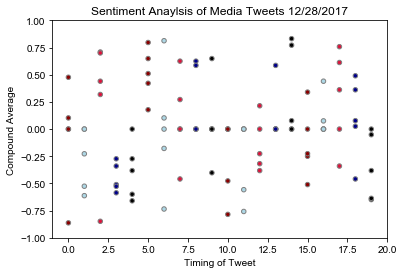

In [16]:
# Create Scatter plot of Compound Sentiments of tweets

colors = ["DarkRed", "LightBlue", "Crimson", "DarkBlue", "Black"]

NewsTweets.plot(kind="scatter", x="Counter", y="Compound", c=colors, edgecolors="grey", title="Sentiment Anaylsis of Media Tweets 12/28/2017")
plt.style.use('seaborn-whitegrid')
plt.xlabel("Timing of Tweet")
plt.ylabel("Compound Average")
plt.legend()
plt.ylim(-1,1)
plt.xlim(-1,20)

plt.show()



In [17]:
# Create Overall Sentiments in Bar Chart

# Get Data by Groupby

Compound_Data = NewsTweets.groupby('Source')
Compound_Mean = Compound_Data['Compound'].mean()

Compound_Mean


Source
BBC   -0.139310
CBS    0.146620
CNN   -0.034010
Fox   -0.043565
NYT    0.019685
Name: Compound, dtype: float64

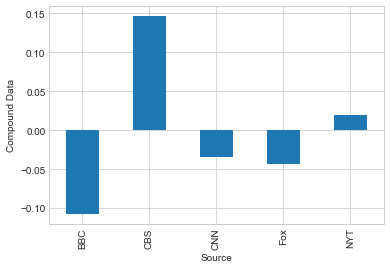

In [184]:
count_chart = Compound_Mean.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Source")
count_chart.set_ylabel("Compound Data")


plt.show()